In [3]:
#!pip install pandas 
#!pip install matplotlib
#!pip install plotly
#!pip install seaborn

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns

In [6]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates = ["date"], index_col = 'date')
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [7]:
lower_bound = df['value'].quantile(0.025)
upper_bound = df['value'].quantile(0.975)

In [14]:
df = df[(df['value'] > lower_bound) & (df['value'] < upper_bound)]
df['value']

date
2016-05-19     19736
2016-05-26     18060
2016-05-27     19997
2016-05-28     19044
2016-05-29     20325
               ...  
2019-11-24    138875
2019-11-29    171584
2019-11-30    141161
2019-12-01    142918
2019-12-03    158549
Name: value, Length: 1238, dtype: int64

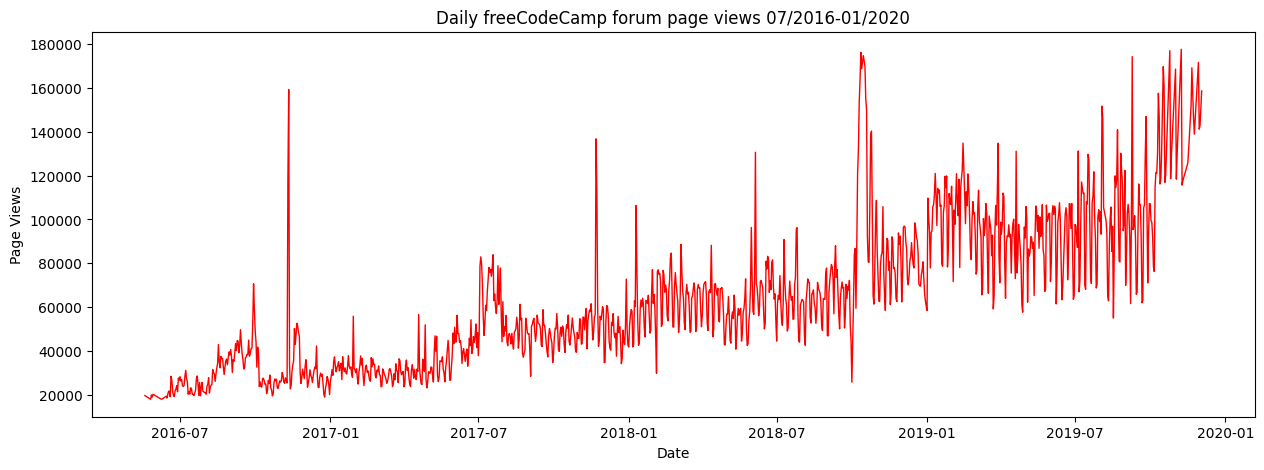

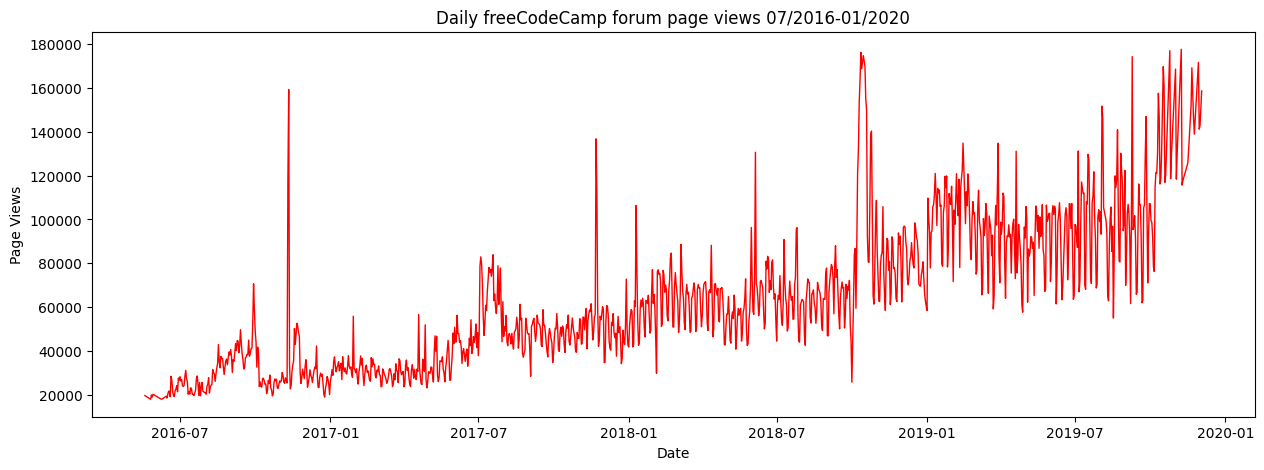

In [15]:
def draw_line_plot():

    fig, ax = plt.subplots(figsize=(15, 5)) 

    ax.plot(df.index, df['value'], 'r', linewidth = 1)
    
    ax.set_title("Daily freeCodeCamp forum page views 07/2016-01/2020")
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    
    # Save the plot before showing it
    fig.savefig('line_plot.png')
    
    # Return the figure object
    return fig

draw_line_plot()

C:\Users\isaac\AppData\Local\Temp\ipykernel_10576\3767623808.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month
C:\Users\isaac\AppData\Local\Temp\ipykernel_10576\3767623808.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.index.year


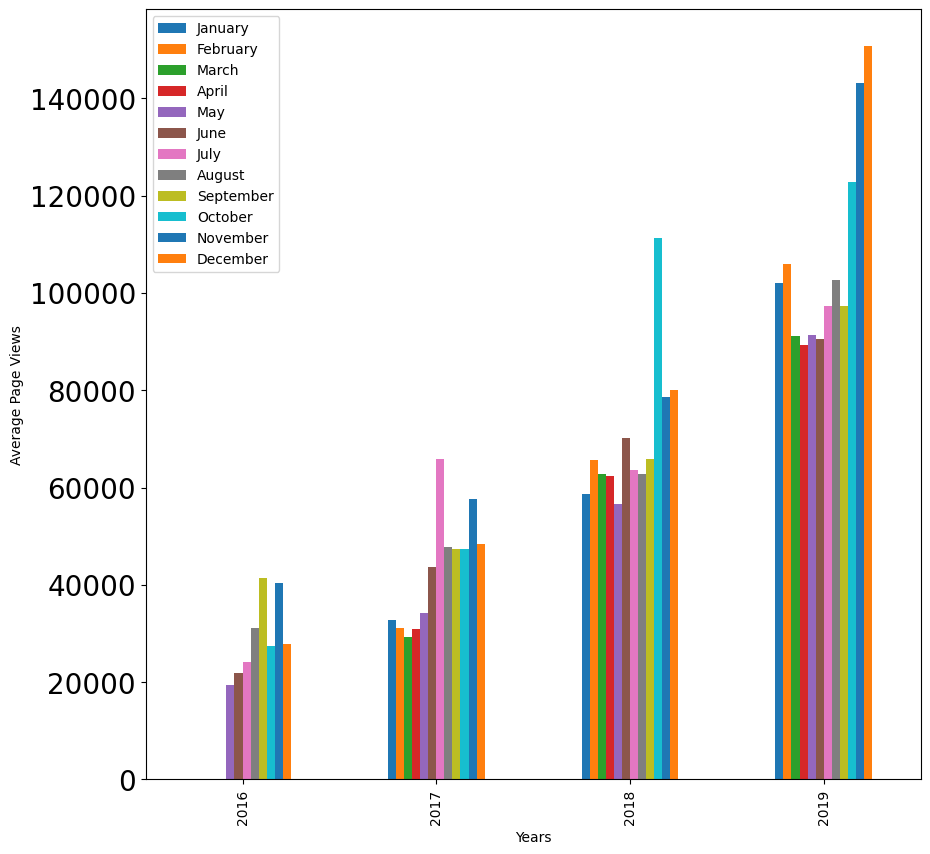

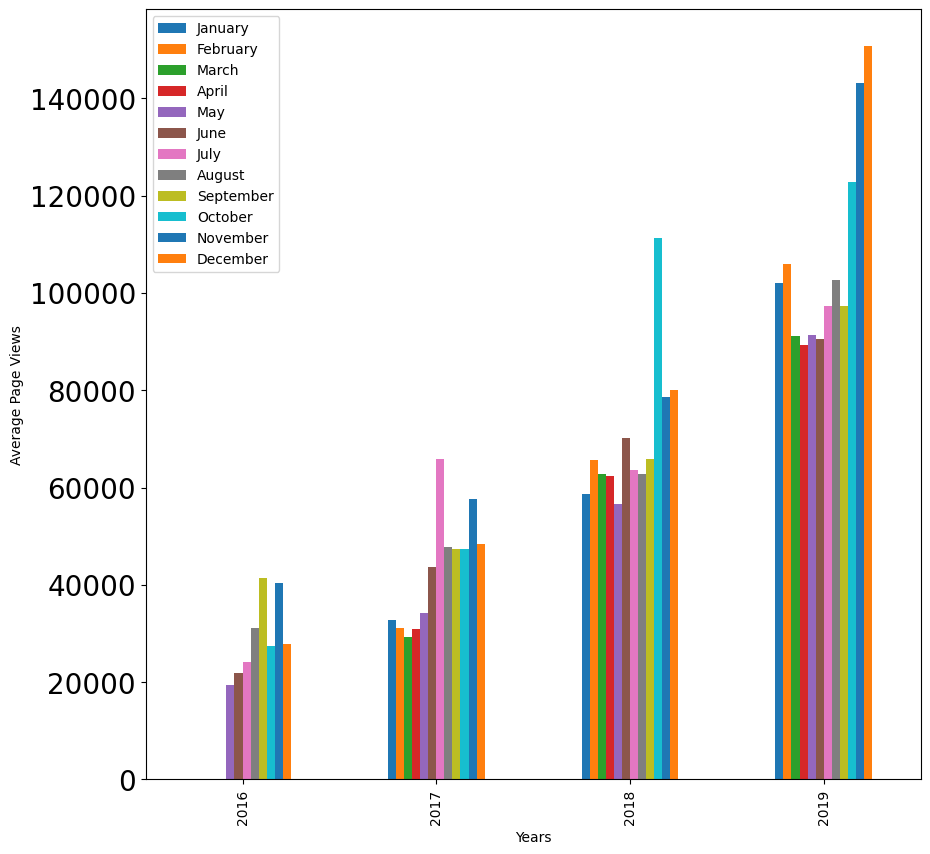

In [17]:
def draw_bar_plot():

    df['month'] = df.index.month
    df['year'] = df.index.year
    df_bar = df.groupby(['year', 'month'])['value'].mean()
    df_bar = df_bar.unstack()


    fig = df_bar.plot.bar(legend = True, figsize=(10,10), ylabel = "Average Page Views", xlabel="Years").figure
    plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 20)

    fig.savefig('bar_plot.png')    
    return fig

draw_bar_plot()

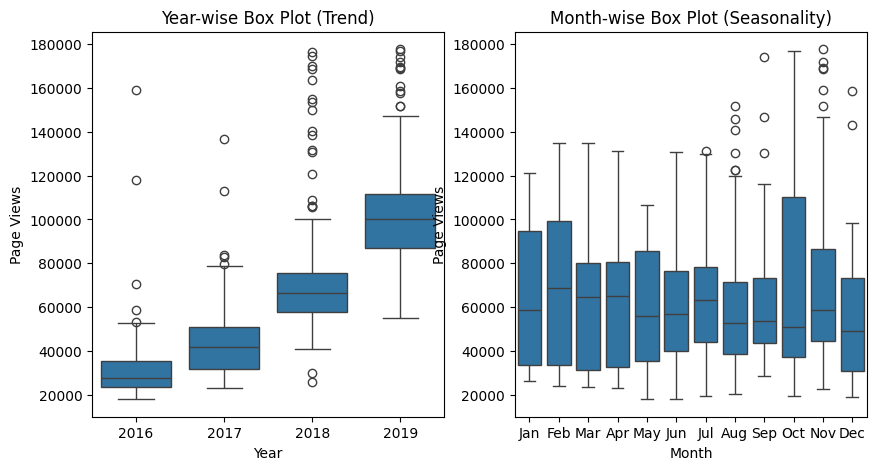

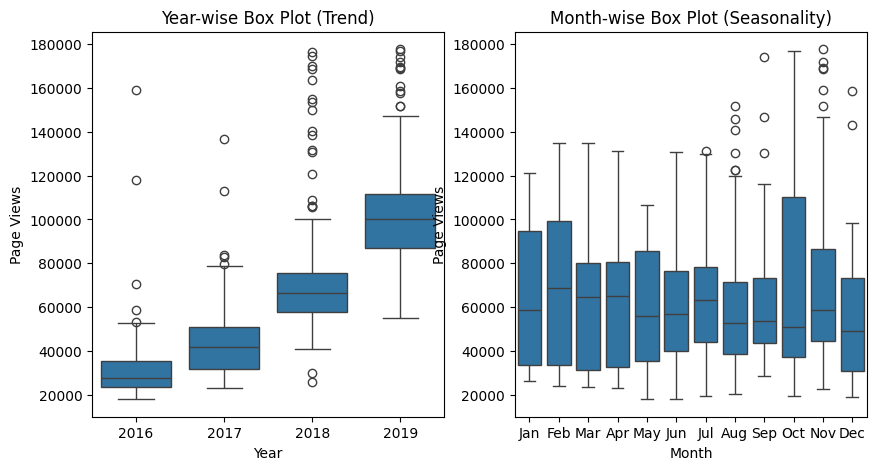

In [18]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]

    # Draw box plots (using Seaborn)
    df_box['month_num'] = df_box["date"].dt.month
    df_box = df_box.sort_values("month_num")
    
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))
    axes[0] = sns.boxplot(x = df_box["year"], y = df_box["value"], ax = axes[0])
    axes[1] = sns.boxplot(x = df_box["month"], y = df_box["value"], ax = axes[1])

    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views") 


    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig
    
draw_box_plot()